In [15]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
satp = pd.read_csv('../../data/dataset_satp_2019.csv')#[:100]
satp

,description,year
0,"A Special Police Officer (SPO), identified as ...",2019.0
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0
2,"On January 1, an ex-United Liberation Front of...",2019.0
3,The number of objections filed on the draft of...,2019.0
4,The Year 2019 will be challenging for the Odis...,2019.0
...,...,...
5293,"Naga Students Federation (NSF) on December 31,...",2019.0
5294,National Register of Citizens (NRC) officials ...,2019.0
5295,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0
5296,The Northeast Today reports that an official s...,2019.0


In [3]:
# cleaning data
#satp['description'] = satp['description'].str.lower()
satp = satp.drop_duplicates().reset_index(drop=True)
satp

,description,year
0,"A Special Police Officer (SPO), identified as ...",2019.0
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0
2,"On January 1, an ex-United Liberation Front of...",2019.0
3,The number of objections filed on the draft of...,2019.0
4,The Year 2019 will be challenging for the Odis...,2019.0
...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0
5291,National Register of Citizens (NRC) officials ...,2019.0
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0
5293,The Northeast Today reports that an official s...,2019.0


In [4]:
satp['description'][0]

'A Special Police Officer (SPO), identified as Sameer Ahmad was killed by suspected militants at Hajan in Pulwama District on January 1 evening, reports Daily Excelsior. Sources said that suspected militants fired at Sameer Ahmad. The injured was immediately taken to a hospital where he was declared as brought dead, sources said. They said the militants managed to escape under the cover of darkness. Security forces were rushed and a search operation was launched to nab the attackers, they added'

In [5]:
data_stripped = []
data_tokenized_words = []
data_tokenized_sentences = []
wl = WordNetLemmatizer()

for i in range(len(satp)):
    # removes unnecessary characters
    row = re.sub('[^a-zA-Z0-9. ]', '', satp['description'][i])
    row = row.lower()
    # tokenization
    row = row.split()
    # lemmatization and stop words removal
    row = [wl.lemmatize(word) for word in row if not word in set(stopwords.words('english'))]
    row2 = re.sub('[^a-zA-Z0-9 ]', '', ' '.join(row))
    row2 = row2.split(' ')
    row3 = ' '.join(row).split('.')
    
    
    data_stripped.append(' '.join(row))
    data_tokenized_words.append(row2)
    data_tokenized_sentences.append(row3)


satp['stripped_description'] = data_stripped
satp['word_tokenized_description'] = data_tokenized_words
satp['sent_tokenized_description'] = data_tokenized_sentences

satp['stripped_description'][0]

'special police officer spo identified sameer ahmad killed suspected militant hajan pulwama district january 1 evening report daily excelsior. source said suspected militant fired sameer ahmad. injured immediately taken hospital declared brought dead source said. said militant managed escape cover darkness. security force rushed search operation launched nab attacker added'

In [6]:
stripped_length = satp['stripped_description'].apply(len)
stripped_length.describe()

count    5295.000000
mean      457.963551
std       239.880082
min        43.000000
25%       279.000000
50%       420.000000
75%       584.000000
max      1949.000000
Name: stripped_description, dtype: float64

<Axes: xlabel='stripped_description', ylabel='Count'>

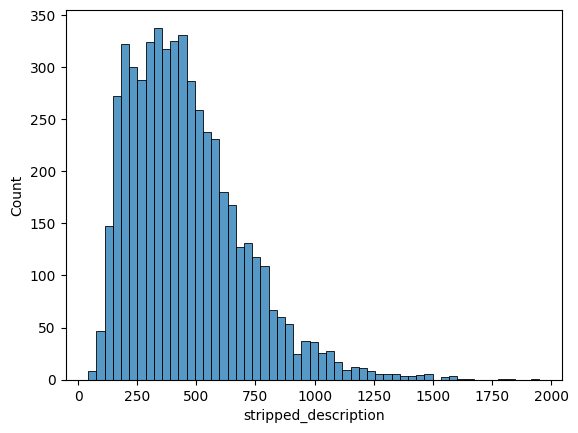

In [15]:
sns.histplot(stripped_length)

In [7]:
satp

,description,year,stripped_description,word_tokenized_description,sent_tokenized_description
0,"A Special Police Officer (SPO), identified as ...",2019.0,special police officer spo identified sameer a...,"[special, police, officer, spo, identified, sa...",[special police officer spo identified sameer ...
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0,armed force special power act afspa extended s...,"[armed, force, special, power, act, afspa, ext...",[armed force special power act afspa extended ...
2,"On January 1, an ex-United Liberation Front of...",2019.0,january 1 exunited liberation front asom ulfa ...,"[january, 1, exunited, liberation, front, asom...",[january 1 exunited liberation front asom ulfa...
3,The number of objections filed on the draft of...,2019.0,number objection filed draft national register...,"[number, objection, filed, draft, national, re...",[number objection filed draft national registe...
4,The Year 2019 will be challenging for the Odis...,2019.0,year 2019 challenging odisha police many impor...,"[year, 2019, challenging, odisha, police, many...",[year 2019 challenging odisha police many impo...
...,...,...,...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0,naga student federation nsf december 31 condem...,"[naga, student, federation, nsf, december, 31,...",[naga student federation nsf december 31 conde...
5291,National Register of Citizens (NRC) officials ...,2019.0,national register citizen nrc official assam p...,"[national, register, citizen, nrc, official, a...",[national register citizen nrc official assam ...
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0,naxalites left wing extremist lwes set ablaze ...,"[naxalites, left, wing, extremist, lwes, set, ...",[naxalites left wing extremist lwes set ablaze...
5293,The Northeast Today reports that an official s...,2019.0,northeast today report official stated decembe...,"[northeast, today, report, official, stated, d...",[northeast today report official stated decemb...


In [8]:
pos_tagger = spacy.load("en_core_web_sm")

In [9]:
temp = pos_tagger(satp['description'][0])
for i in temp:
    print(i, "|", i.pos_,"|",spacy.explain(i.pos_),"|",i.tag_,spacy.explain(i.tag_))


A | DET | determiner | DT determiner
Special | PROPN | proper noun | NNP noun, proper singular
Police | PROPN | proper noun | NNP noun, proper singular
Officer | PROPN | proper noun | NNP noun, proper singular
( | PUNCT | punctuation | -LRB- left round bracket
SPO | PROPN | proper noun | NNP noun, proper singular
) | PUNCT | punctuation | -RRB- right round bracket
, | PUNCT | punctuation | , punctuation mark, comma
identified | VERB | verb | VBN verb, past participle
as | SCONJ | subordinating conjunction | IN conjunction, subordinating or preposition
Sameer | PROPN | proper noun | NNP noun, proper singular
Ahmad | PROPN | proper noun | NNP noun, proper singular
was | AUX | auxiliary | VBD verb, past tense
killed | VERB | verb | VBN verb, past participle
by | ADP | adposition | IN conjunction, subordinating or preposition
suspected | VERB | verb | VBN verb, past participle
militants | NOUN | noun | NNS noun, plural
at | ADP | adposition | IN conjunction, subordinating or preposition
Ha

In [10]:
satp.to_csv('../../data/cleaned_tokenized_satp.csv', index=False)
satp

,description,year,stripped_description,word_tokenized_description,sent_tokenized_description
0,"A Special Police Officer (SPO), identified as ...",2019.0,special police officer spo identified sameer a...,"[special, police, officer, spo, identified, sa...",[special police officer spo identified sameer ...
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0,armed force special power act afspa extended s...,"[armed, force, special, power, act, afspa, ext...",[armed force special power act afspa extended ...
2,"On January 1, an ex-United Liberation Front of...",2019.0,january 1 exunited liberation front asom ulfa ...,"[january, 1, exunited, liberation, front, asom...",[january 1 exunited liberation front asom ulfa...
3,The number of objections filed on the draft of...,2019.0,number objection filed draft national register...,"[number, objection, filed, draft, national, re...",[number objection filed draft national registe...
4,The Year 2019 will be challenging for the Odis...,2019.0,year 2019 challenging odisha police many impor...,"[year, 2019, challenging, odisha, police, many...",[year 2019 challenging odisha police many impo...
...,...,...,...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0,naga student federation nsf december 31 condem...,"[naga, student, federation, nsf, december, 31,...",[naga student federation nsf december 31 conde...
5291,National Register of Citizens (NRC) officials ...,2019.0,national register citizen nrc official assam p...,"[national, register, citizen, nrc, official, a...",[national register citizen nrc official assam ...
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0,naxalites left wing extremist lwes set ablaze ...,"[naxalites, left, wing, extremist, lwes, set, ...",[naxalites left wing extremist lwes set ablaze...
5293,The Northeast Today reports that an official s...,2019.0,northeast today report official stated decembe...,"[northeast, today, report, official, stated, d...",[northeast today report official stated decemb...


In [3]:
# confirming output csv is of proper format
satp = pd.read_csv('../../data/cleaned_tokenized_satp.csv')#[:100]
satp

,description,year,stripped_description,word_tokenized_description,sent_tokenized_description
0,"A Special Police Officer (SPO), identified as ...",2019.0,special police officer spo identified sameer a...,"['special', 'police', 'officer', 'spo', 'ident...",['special police officer spo identified sameer...
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0,armed force special power act afspa extended s...,"['armed', 'force', 'special', 'power', 'act', ...",['armed force special power act afspa extended...
2,"On January 1, an ex-United Liberation Front of...",2019.0,january 1 exunited liberation front asom ulfa ...,"['january', '1', 'exunited', 'liberation', 'fr...",['january 1 exunited liberation front asom ulf...
3,The number of objections filed on the draft of...,2019.0,number objection filed draft national register...,"['number', 'objection', 'filed', 'draft', 'nat...",['number objection filed draft national regist...
4,The Year 2019 will be challenging for the Odis...,2019.0,year 2019 challenging odisha police many impor...,"['year', '2019', 'challenging', 'odisha', 'pol...",['year 2019 challenging odisha police many imp...
...,...,...,...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0,naga student federation nsf december 31 condem...,"['naga', 'student', 'federation', 'nsf', 'dece...",['naga student federation nsf december 31 cond...
5291,National Register of Citizens (NRC) officials ...,2019.0,national register citizen nrc official assam p...,"['national', 'register', 'citizen', 'nrc', 'of...",['national register citizen nrc official assam...
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0,naxalites left wing extremist lwes set ablaze ...,"['naxalites', 'left', 'wing', 'extremist', 'lw...",['naxalites left wing extremist lwes set ablaz...
5293,The Northeast Today reports that an official s...,2019.0,northeast today report official stated decembe...,"['northeast', 'today', 'report', 'official', '...",['northeast today report official stated decem...


In [5]:
rawdf = satp[:2,:]
rawdf

,description,year
0,"A Special Police Officer (SPO), identified as ...",2019.0
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0
2,"On January 1, an ex-United Liberation Front of...",2019.0
3,The number of objections filed on the draft of...,2019.0
4,The Year 2019 will be challenging for the Odis...,2019.0
...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0
5291,National Register of Citizens (NRC) officials ...,2019.0
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0
5293,The Northeast Today reports that an official s...,2019.0


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\varun/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1520.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1520.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1520.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\varun\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
